#Dataverwerking

##Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    silhouette_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import matplotlib.pyplot as plt
import logging
import re
from urllib.parse import urlparse

# Configure logging
logging.basicConfig(level=logging.ERROR)

try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive is gekoppeld!")
except ModuleNotFoundError:
    print("Niet in Google Colab, slaan Google Drive-mount over.")




Mounted at /content/drive
Google Drive is gekoppeld!


##Controle

In [ ]:
import os
import numpy as np

# Pad naar de outputmap met .npy-bestanden
data_path = "/content/drive/MyDrive/Afstuderen/Deadline/output"

# Lijst om de paden van gevonden .npy-bestanden op te slaan
npy_files = []

# Doorzoek de map (en eventuele submappen) naar .npy-bestanden
for root, _, files in os.walk(data_path):
    for file in files:
        if file.endswith(".npy"):
            npy_files.append(os.path.join(root, file))

# Overzicht van gevonden bestanden
print("Gevonden .npy bestanden:")
if not npy_files:
    print("Geen .npy bestanden gevonden.")
else:
    # Voor elk bestand: de bestandsnaam zonder pad tonen + vorm van de data
    for file in npy_files:
        data = np.load(file)
        print(f"Bestand: {os.path.basename(file)}, Vorm: {data.shape}")


Gevonden .npy bestanden:
Bestand: features_benign_2019_balanced.npy, Vorm: (18039, 300)
Bestand: labels_benign_2019_balanced.npy, Vorm: (18039,)
Bestand: features_malicious_2019_balanced.npy, Vorm: (16067, 300)
Bestand: labels_malicious_2019_balanced.npy, Vorm: (16067,)
Bestand: features_benign_2020_balanced.npy, Vorm: (87762, 300)
Bestand: labels_benign_2020_balanced.npy, Vorm: (87762,)
Bestand: features_malicious_2020_balanced.npy, Vorm: (72785, 300)
Bestand: labels_malicious_2020_balanced.npy, Vorm: (72785,)
Bestand: features_benign_2018_balanced.npy, Vorm: (15853, 300)
Bestand: labels_benign_2018_balanced.npy, Vorm: (15853,)
Bestand: features_malicious_2018_balanced.npy, Vorm: (15781, 300)
Bestand: labels_malicious_2018_balanced.npy, Vorm: (15781,)


#Voorbeeld

In [ ]:
from pathlib import Path
from bs4 import BeautifulSoup
import chardet

# Specificeer het bestand dat gelezen moet worden
html_file = Path(r"C:/Users/cihat/Downloads/Phishing_dataset1/benign/2018/2018/00a65ae2-d372-11e8-9388-b01041fd2fc1.htm")

# Functie om een specifiek HTML-bestand te laden en de inhoud te tonen
def load_and_display_html_with_url(file_path):
    try:
        # Detecteer encoding
        with open(file_path, 'rb') as f:
            raw_data = f.read()
            detected_encoding = chardet.detect(raw_data)['encoding'] or 'utf-8'

        # Lees en parse HTML
        with open(file_path, 'r', encoding=detected_encoding, errors='ignore') as f:
            soup = BeautifulSoup(f, 'lxml')

        # Zoek naar een URL in de HTML (bijvoorbeeld in <a> of <link> tags)
        urls = [a['href'] for a in soup.find_all('a', href=True)]
        url_example = urls[0] if urls else "Geen URL gevonden"

        # Toon de HTML-titel, tekst en URL
        title = soup.title.string if soup.title else "Geen titel"
        text = soup.get_text(separator="\n", strip=True)

        print(f"Bestand: {file_path}")
        print(f"Encoding: {detected_encoding}")
        print(f"Title: {title}")
        print(f"URL: {url_example}")
        print("\nContent:")
        print(text[:1000])  # Toon de eerste 1000 karakters van de inhoud

    except Exception as e:
        print(f"Er is een fout opgetreden bij het verwerken van {file_path}: {e}")

# Laad en toon het specifieke HTML-bestand
load_and_display_html_with_url(html_file)


Bestand: C:\Users\cihat\Downloads\Phishing_dataset1\benign\2018\2018\00a65ae2-d372-11e8-9388-b01041fd2fc1.htm
Encoding: utf-8
Title: Cleveland OH Local News, Breaking News, Sports & Weather - cleveland.com
URL: http://www.cleveland.com/

Content:
Cleveland OH Local News, Breaking News, Sports & Weather - cleveland.com
More Coverage
Menu
Home
News
›
‹
Back To Main Menu
Metro
The Plain Dealer
Weather
Health & Medical
Crime
Data Central
Columnists
›
‹
Back To Main Menu
Mark Naymik
Michael McIntyre
Phillip Morris
City Club of Cleveland
Courts
Nation
World
Special Reports
›
‹
Back To Main Menu
A Greater Cleveland
A Critical Choice: Nursing home care
At Any (Court) Cost
Cleveland's Bike Life
Dear Cleveland
Heroins Human Toll
Justice for All: Bail reform
Know the RX: Opioid addiction resources
Out of Line: Gerrymandering in Ohio
Recovering Hope
Remaking The Q
Stolen in the Suburbs
Politics
›
‹
Back To Main Menu
State Politics
National Politics & Elections
Cleveland City Hall
Cuyahoga County I

#PCA-analyse

##1D-PCA

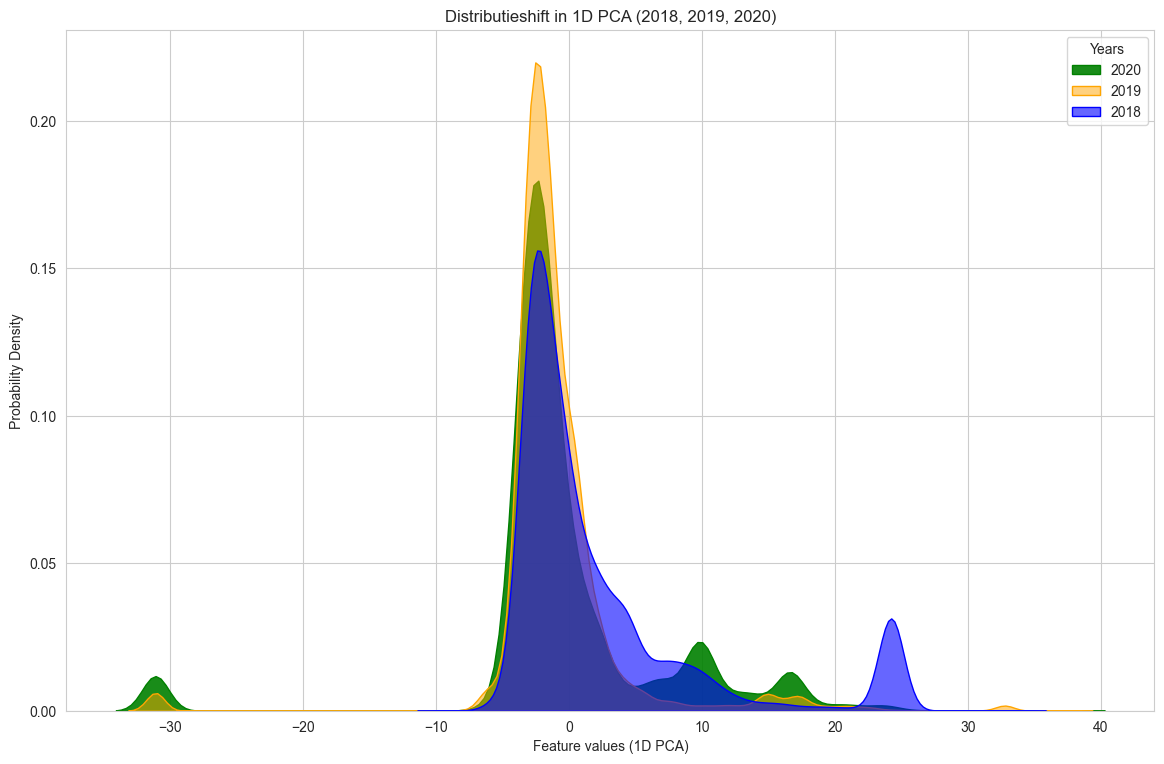

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

# ----------------------------------------------------------------------------
# 1. Data inladen (pas paden aan naar jouw situatie)
# ----------------------------------------------------------------------------
base_path = r"/content/drive/MyDrive/Afstuderen/Deadline/output"

features_benign_2018 = np.load(f"{base_path}/features_benign_2018_balanced.npy")
features_malicious_2018 = np.load(f"{base_path}/features_malicious_2018_balanced.npy")
X_2018 = np.vstack([features_benign_2018, features_malicious_2018])

features_benign_2019 = np.load(f"{base_path}/features_benign_2019_balanced.npy")
features_malicious_2019 = np.load(f"{base_path}/features_malicious_2019_balanced.npy")
X_2019 = np.vstack([features_benign_2019, features_malicious_2019])

features_benign_2020 = np.load(f"{base_path}/features_benign_2020_balanced.npy")
features_malicious_2020 = np.load(f"{base_path}/features_malicious_2020_balanced.npy")
X_2020 = np.vstack([features_benign_2020, features_malicious_2020])

X_all = np.vstack([X_2018, X_2019, X_2020])
labels_year = (
    [2018] * len(X_2018) +
    [2019] * len(X_2019) +
    [2020] * len(X_2020)
)
labels_year = np.array(labels_year)

# ----------------------------------------------------------------------------
# 2. Normaliseren met StandardScaler
# ----------------------------------------------------------------------------
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# ----------------------------------------------------------------------------
# 3. PCA (1D) toepassen
# ----------------------------------------------------------------------------
pca = PCA(n_components=1)
X_all_pca = pca.fit_transform(X_all_scaled)

# ----------------------------------------------------------------------------
# 4. Splits de 1D-PCA-scores per jaar
# ----------------------------------------------------------------------------
pca_2018 = X_all_pca[labels_year == 2018].ravel()
pca_2019 = X_all_pca[labels_year == 2019].ravel()
pca_2020 = X_all_pca[labels_year == 2020].ravel()

# ----------------------------------------------------------------------------
# 5. Controleer op NaN of inf waarden en verwijder deze
# ----------------------------------------------------------------------------
pca_2018 = pca_2018[np.isfinite(pca_2018)]
pca_2019 = pca_2019[np.isfinite(pca_2019)]
pca_2020 = pca_2020[np.isfinite(pca_2020)]

# ----------------------------------------------------------------------------
# 6. Maak samplegroottes gelijk
# ----------------------------------------------------------------------------
min_samples = min(len(pca_2018), len(pca_2019), len(pca_2020))
np.random.seed(42)
pca_2018 = np.random.choice(pca_2018, min_samples, replace=False)
pca_2019 = np.random.choice(pca_2019, min_samples, replace=False)
pca_2020 = np.random.choice(pca_2020, min_samples, replace=False)

# ----------------------------------------------------------------------------
# 7. Maak een gecombineerde KDE-plot
# ----------------------------------------------------------------------------
sns.set_style("whitegrid")

# Onderdruk waarschuwingen tijdelijk
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    plt.figure(figsize=(12, 8))  # Grotere figuur

    # Grote curves eerst (2020, 2019), kleinere (2018) laatste

    sns.kdeplot(pca_2020, fill=True, alpha=0.9, color='green', label='2020')  # Minder transparantie
    sns.kdeplot(pca_2019, fill=True, alpha=0.5, color='orange', label='2019')  # Minder transparantie

    sns.kdeplot(pca_2018, fill=True, alpha=0.6, color='blue', label='2018')  # Minder transparantie

    plt.xlabel("Feature values (1D PCA)")
    plt.ylabel("Probability Density")
    plt.title("Distributieshift in 1D PCA (2018, 2019, 2020)")
    plt.legend(title="Years", loc='upper right')
    plt.tight_layout(pad=2)  # Extra padding
    plt.show()


C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


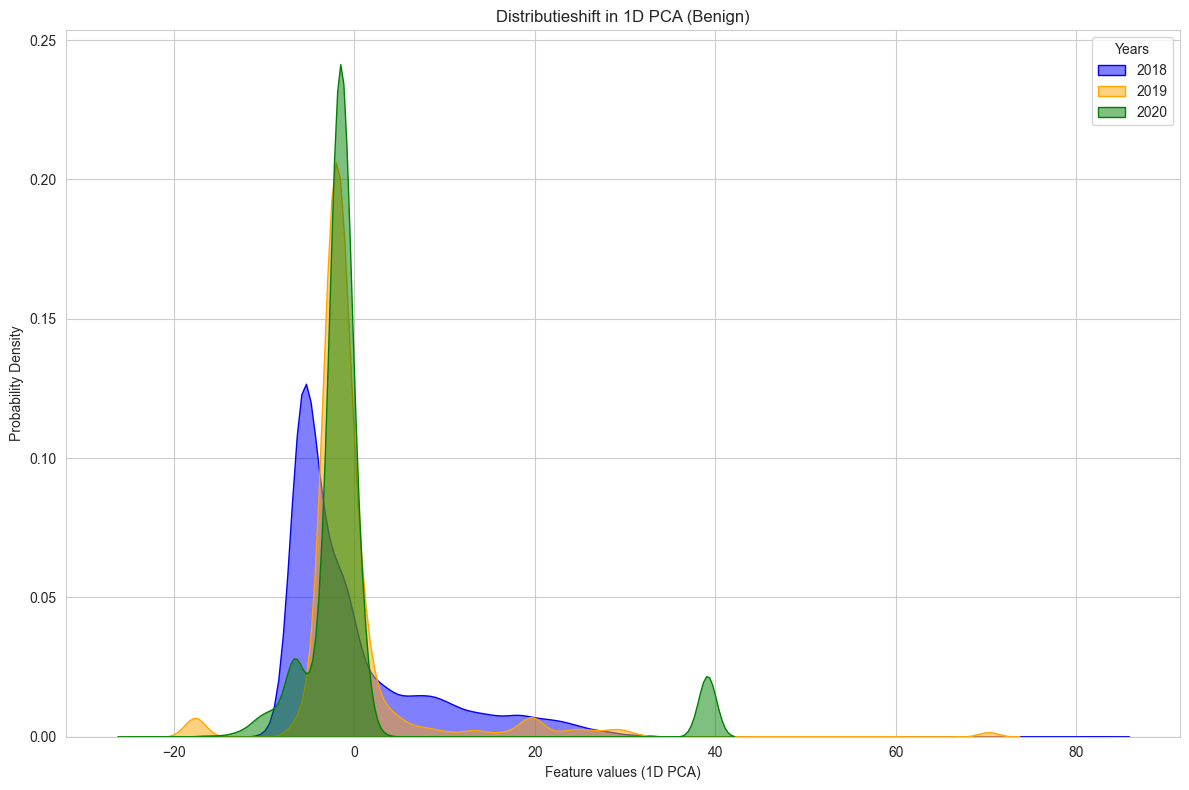

C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


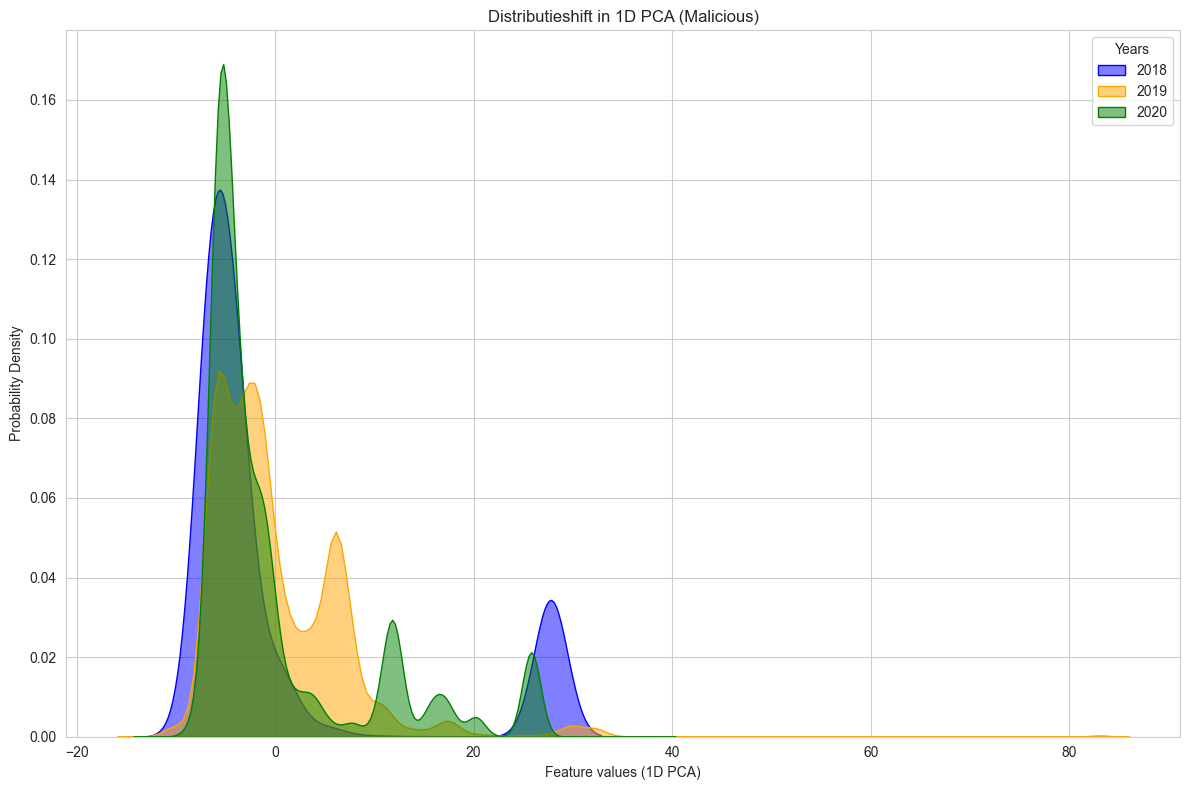

C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cihat\miniconda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


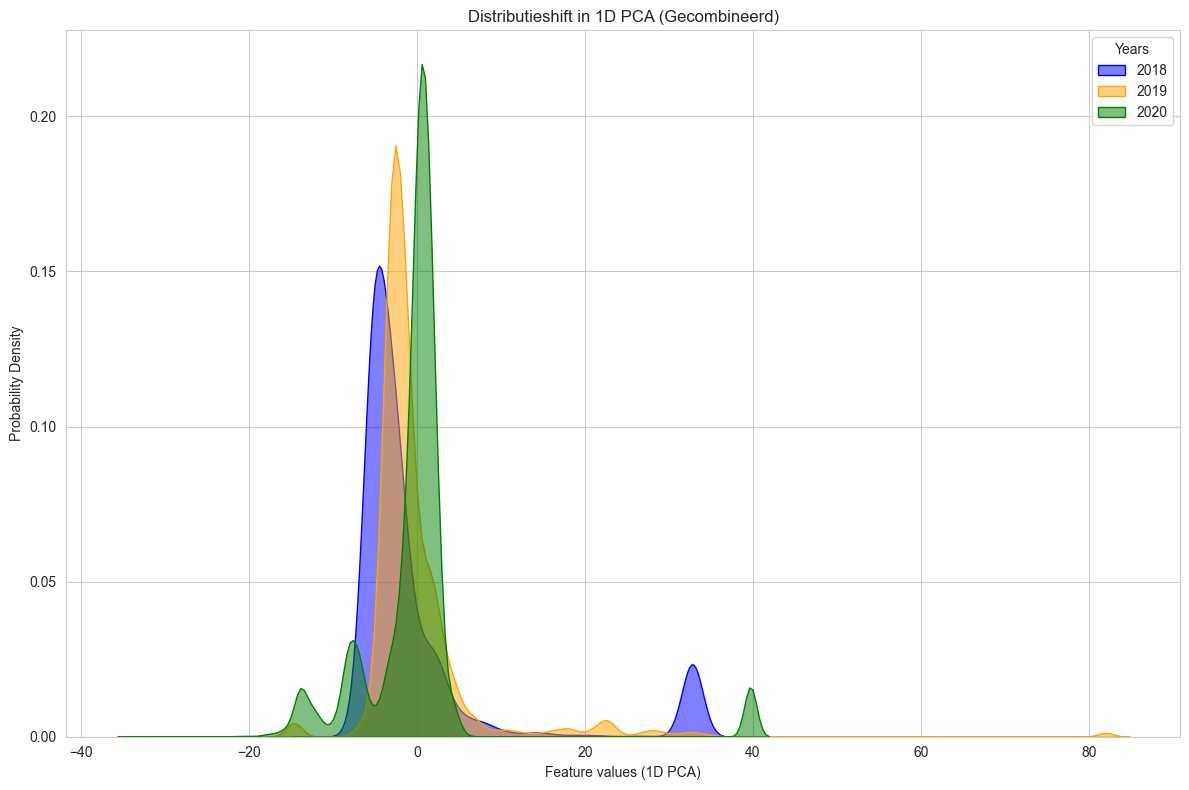

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data inladen (pas paden aan naar jouw situatie)
base_path = r"/content/drive/MyDrive/Afstuderen/Deadline/output"

# Benign data
features_benign_2018 = np.load(f"{base_path}/features_benign_2018_balanced.npy")
features_benign_2019 = np.load(f"{base_path}/features_benign_2019_balanced.npy")
features_benign_2020 = np.load(f"{base_path}/features_benign_2020_balanced.npy")
X_benign = [features_benign_2018, features_benign_2019, features_benign_2020]

# Malicious data
features_malicious_2018 = np.load(f"{base_path}/features_malicious_2018_balanced.npy")
features_malicious_2019 = np.load(f"{base_path}/features_malicious_2019_balanced.npy")
features_malicious_2020 = np.load(f"{base_path}/features_malicious_2020_balanced.npy")
X_malicious = [features_malicious_2018, features_malicious_2019, features_malicious_2020]

# Combineren van Benign en Malicious
X_combined = [
    np.vstack([features_benign_2018, features_malicious_2018]),
    np.vstack([features_benign_2019, features_malicious_2019]),
    np.vstack([features_benign_2020, features_malicious_2020]),
]

# PCA-functie
def apply_pca(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    pca = PCA(n_components=1)
    return pca.fit_transform(data_scaled).ravel()

# PCA per categorie
pca_benign = [apply_pca(year) for year in X_benign]
pca_malicious = [apply_pca(year) for year in X_malicious]
pca_combined = [apply_pca(year) for year in X_combined]

# Plot-functie
def plot_pca_distribution(pca_data, title, labels, colors, filename=None):
    plt.figure(figsize=(12, 8))
    for data, label, color in zip(pca_data, labels, colors):
        sns.kdeplot(data, fill=True, alpha=0.5, label=label, color=color)
    plt.xlabel("Feature values (1D PCA)")
    plt.ylabel("Probability Density")
    plt.title(title)
    plt.legend(title="Years", loc="upper right")
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

# Plot voor Benign
plot_pca_distribution(
    pca_benign,
    "Distributieshift in 1D PCA (Benign)",
    labels=["2018", "2019", "2020"],
    colors=["blue", "orange", "green"],
    filename="pca_benign.png",
)

# Plot voor Malicious
plot_pca_distribution(
    pca_malicious,
    "Distributieshift in 1D PCA (Malicious)",
    labels=["2018", "2019", "2020"],
    colors=["blue", "orange", "green"],
    filename="pca_malicious.png",
)

# Plot voor Gecombineerd
plot_pca_distribution(
    pca_combined,
    "Distributieshift in 1D PCA (Gecombineerd)",
    labels=["2018", "2019", "2020"],
    colors=["blue", "orange", "green"],
    filename="pca_combined.png",
)


##2D-PCA

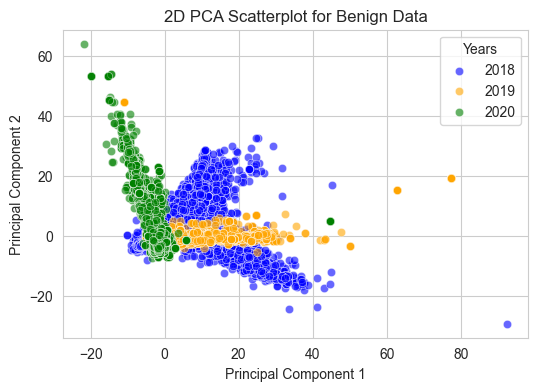

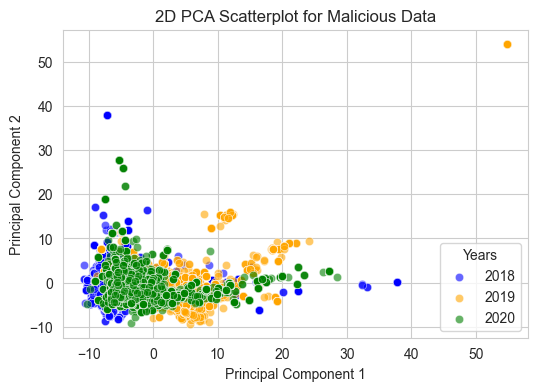

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ----------------------------------------------------------------------------
# 1. Data inladen (pas paden aan naar jouw situatie)
# ----------------------------------------------------------------------------
base_path = r"/content/drive/MyDrive/Afstuderen/Deadline/output"

features_benign_2018 = np.load(f"{base_path}/features_benign_2018_balanced.npy")
features_benign_2019 = np.load(f"{base_path}/features_benign_2019_balanced.npy")
features_benign_2020 = np.load(f"{base_path}/features_benign_2020_balanced.npy")
features_malicious_2018 = np.load(f"{base_path}/features_malicious_2018_balanced.npy")
features_malicious_2019 = np.load(f"{base_path}/features_malicious_2019_balanced.npy")
features_malicious_2020 = np.load(f"{base_path}/features_malicious_2020_balanced.npy")

# ----------------------------------------------------------------------------
# 2. Combineer en normaliseer data
# ----------------------------------------------------------------------------
scaler = StandardScaler()

# Combineer alle data voor consistent schalen
X_combined = np.vstack([
    features_benign_2018, features_benign_2019, features_benign_2020,
    features_malicious_2018, features_malicious_2019, features_malicious_2020
])
X_combined_scaled = scaler.fit_transform(X_combined)

# Splits de geschaalde data per categorie
n_benign_2018 = len(features_benign_2018)
n_benign_2019 = len(features_benign_2019)
n_benign_2020 = len(features_benign_2020)

X_benign_2018 = X_combined_scaled[:n_benign_2018]
X_benign_2019 = X_combined_scaled[n_benign_2018:n_benign_2018 + n_benign_2019]
X_benign_2020 = X_combined_scaled[n_benign_2018 + n_benign_2019:n_benign_2018 + n_benign_2019 + n_benign_2020]

X_malicious_2018 = X_combined_scaled[n_benign_2018 + n_benign_2019 + n_benign_2020:
                                     n_benign_2018 + n_benign_2019 + n_benign_2020 + len(features_malicious_2018)]
X_malicious_2019 = X_combined_scaled[n_benign_2018 + n_benign_2019 + n_benign_2020 + len(features_malicious_2018):
                                     n_benign_2018 + n_benign_2019 + n_benign_2020 + len(features_malicious_2018) + len(features_malicious_2019)]
X_malicious_2020 = X_combined_scaled[n_benign_2018 + n_benign_2019 + n_benign_2020 + len(features_malicious_2018) + len(features_malicious_2019):]

# ----------------------------------------------------------------------------
# 3. Maak samplegroottes gelijk
# ----------------------------------------------------------------------------
min_samples_benign = min(len(X_benign_2018), len(X_benign_2019), len(X_benign_2020))
min_samples_malicious = min(len(X_malicious_2018), len(X_malicious_2019), len(X_malicious_2020))

np.random.seed(42)

# Selecteer willekeurige rijen voor benign data
indices_benign_2018 = np.random.choice(len(X_benign_2018), min_samples_benign, replace=False)
indices_benign_2019 = np.random.choice(len(X_benign_2019), min_samples_benign, replace=False)
indices_benign_2020 = np.random.choice(len(X_benign_2020), min_samples_benign, replace=False)

X_benign_2018 = X_benign_2018[indices_benign_2018]
X_benign_2019 = X_benign_2019[indices_benign_2019]
X_benign_2020 = X_benign_2020[indices_benign_2020]

# Selecteer willekeurige rijen voor malicious data
indices_malicious_2018 = np.random.choice(len(X_malicious_2018), min_samples_malicious, replace=False)
indices_malicious_2019 = np.random.choice(len(X_malicious_2019), min_samples_malicious, replace=False)
indices_malicious_2020 = np.random.choice(len(X_malicious_2020), min_samples_malicious, replace=False)

X_malicious_2018 = X_malicious_2018[indices_malicious_2018]
X_malicious_2019 = X_malicious_2019[indices_malicious_2019]
X_malicious_2020 = X_malicious_2020[indices_malicious_2020]

# ----------------------------------------------------------------------------
# 4. 2D PCA toepassen
# ----------------------------------------------------------------------------
pca_2d = PCA(n_components=2)

# Benign
X_benign_2018_pca = pca_2d.fit_transform(X_benign_2018)
X_benign_2019_pca = pca_2d.fit_transform(X_benign_2019)
X_benign_2020_pca = pca_2d.fit_transform(X_benign_2020)

# Malicious
X_malicious_2018_pca = pca_2d.fit_transform(X_malicious_2018)
X_malicious_2019_pca = pca_2d.fit_transform(X_malicious_2019)
X_malicious_2020_pca = pca_2d.fit_transform(X_malicious_2020)

# ----------------------------------------------------------------------------
# 5. Plot Benign Data (2D Scatterplot)
# ----------------------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_benign_2018_pca[:, 0], y=X_benign_2018_pca[:, 1], label='2018', alpha=0.6, color='blue')
sns.scatterplot(x=X_benign_2019_pca[:, 0], y=X_benign_2019_pca[:, 1], label='2019', alpha=0.6, color='orange')
sns.scatterplot(x=X_benign_2020_pca[:, 0], y=X_benign_2020_pca[:, 1], label='2020', alpha=0.6, color='green')
plt.title("2D PCA Scatterplot for Benign Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Years")
plt.show()

# ----------------------------------------------------------------------------
# 6. Plot Malicious Data (2D Scatterplot)
# ----------------------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_malicious_2018_pca[:, 0], y=X_malicious_2018_pca[:, 1], label='2018', alpha=0.6, color='blue')
sns.scatterplot(x=X_malicious_2019_pca[:, 0], y=X_malicious_2019_pca[:, 1], label='2019', alpha=0.6, color='orange')
sns.scatterplot(x=X_malicious_2020_pca[:, 0], y=X_malicious_2020_pca[:, 1], label='2020', alpha=0.6, color='green')
plt.title("2D PCA Scatterplot for Malicious Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Years")
plt.show()
